# 导入模块并创建数据

In [2]:
import numpy as np
np.random.seed(1337)

from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

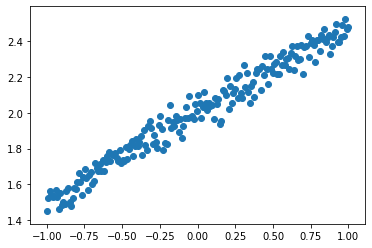

In [3]:
# 生成数据
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)
Y = 0.5*X + 2 + np.random.normal(0, 0.05, (200, ))

# plot data
plt.scatter(X, Y)
plt.show()

In [4]:
X_train, Y_train = X[:160], Y[:160]
X_test, Y_test = X[160:], Y[160:]

# 建立模型

In [5]:
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))

W0727 21:25:55.086597 4321588096 deprecation_wrapper.py:119] From /Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  
W0727 21:25:55.113930 4321588096 deprecation_wrapper.py:119] From /Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 21:25:55.118681 4321588096 deprecation_wrapper.py:119] From /Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.rando

# 激活函数

In [6]:
# choose loss function and optimizing method
model.compile(loss='mse', optimizer='sgd')

W0727 21:25:57.009714 4321588096 deprecation_wrapper.py:119] From /Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



# 训练模型

In [7]:
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost:', cost)

W0727 21:25:59.070949 4321588096 deprecation_wrapper.py:119] From /Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0727 21:25:59.089020 4321588096 deprecation_wrapper.py:119] From /Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



train cost: 4.0225005
train cost: 0.073238626
train cost: 0.00386274
train cost: 0.002643449


# 模型检验

In [9]:
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

40/40 [==============================] - 0s 26us/step
test cost: 0.0031367032788693905
Weights= [[0.4922711]] 
biases= [1.9995022]


# 可视化结果

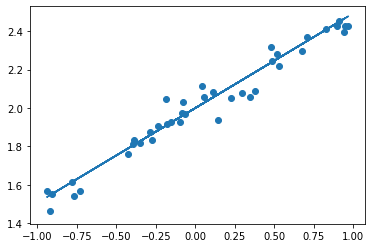

In [10]:
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()